In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN
#import ydata_profiling

In [2]:
sns.set_theme(context='paper', style='dark', palette='dark')

# EDA

In [3]:
df = pd.read_csv('ai4i2020.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [4]:
# Replacing the whitespaces with _
df.columns = df.columns.str.replace(' ','_')
df

,UDI,Product_ID,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [5]:
# Correlation matrix
df.corr(numeric_only=True)

,UDI,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air_temperature_[K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process_temperature_[K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational_speed_[rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque_[Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool_wear_[min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine_failure,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


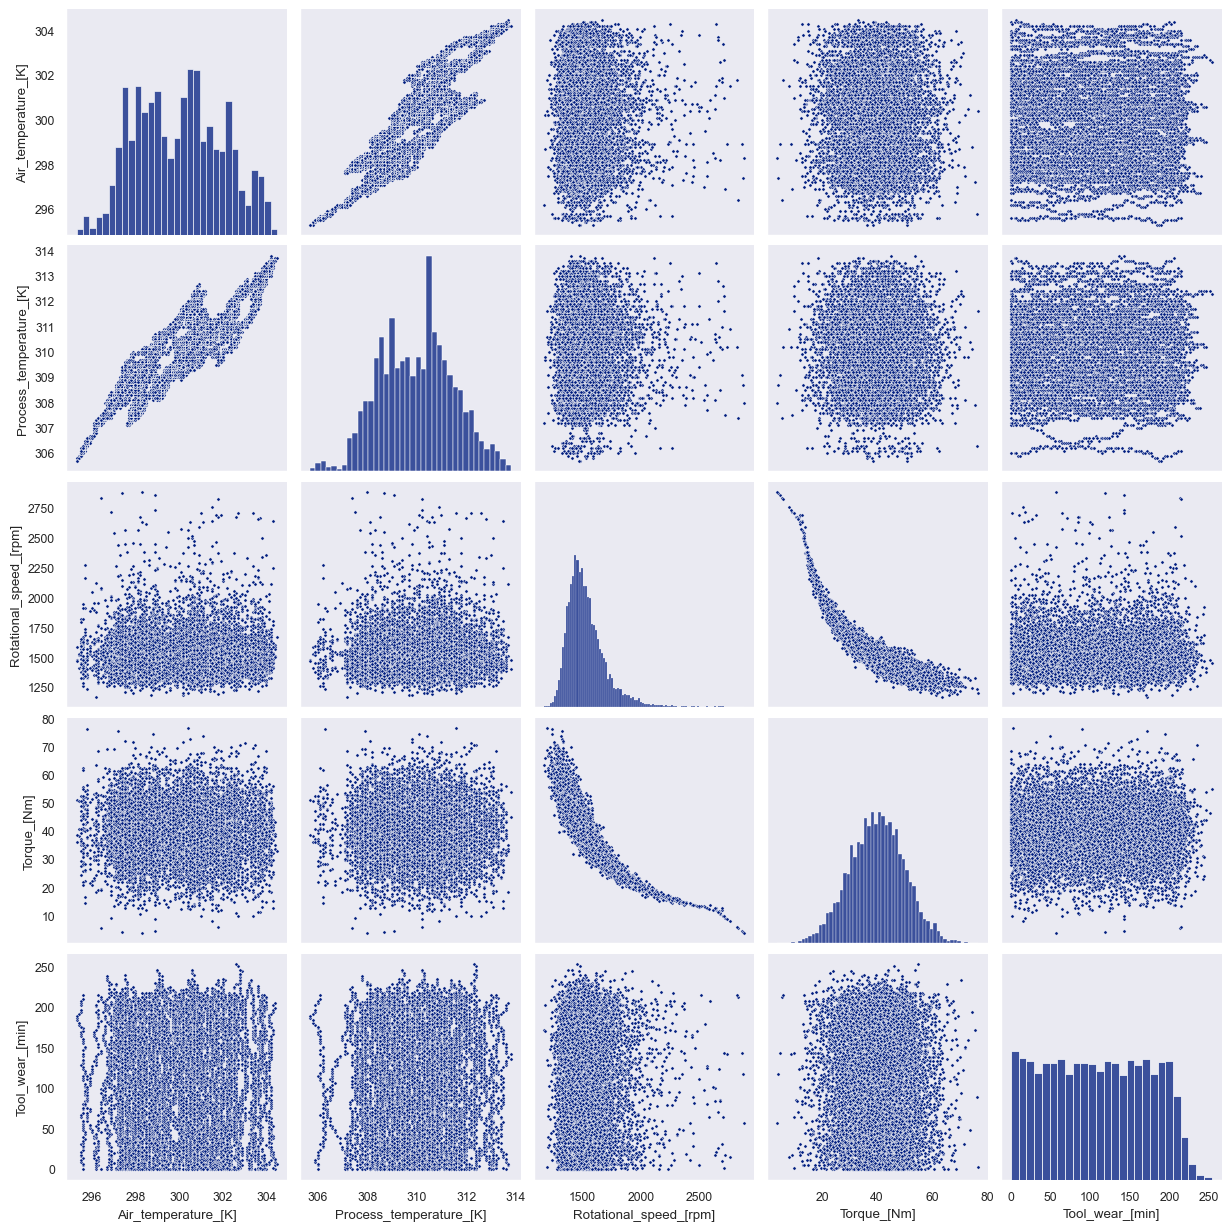

In [7]:
# Pairplots of the relevant variables
cool = ['Air_temperature_[K]', 'Process_temperature_[K]','Rotational_speed_[rpm]','Torque_[Nm]','Tool_wear_[min]']
sns.pairplot(df[cool], markers='.')

In [8]:
# Filtering for multiple simulatneous failure modes
modes = ['TWF','HDF','PWF','OSF','RNF']

df[df[modes].sum(axis=1) > 1].reset_index()

,index,UDI,Product_ID,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure,TWF,HDF,PWF,OSF,RNF
0,69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
1,1324,1325,M16184,M,298.8,310.1,1243,74.5,194,1,0,0,1,1,0
2,1496,1497,L48676,L,298.0,308.7,1268,69.4,189,1,0,0,1,1,0
3,3611,3612,L50791,L,301.7,310.9,1405,46.4,207,1,1,0,0,0,1
4,3854,3855,L51034,L,302.4,311.0,1338,67.6,194,1,0,0,1,1,0
5,3943,3944,L51123,L,302.3,311.4,1333,66.7,205,1,0,0,1,1,0
6,4254,4255,L51434,L,302.6,311.0,1284,68.0,114,1,0,1,1,0,0
7,4342,4343,M19202,M,301.7,309.8,1284,68.2,111,1,0,1,1,0,0
8,4370,4371,L51550,L,302.0,309.9,1308,57.6,197,1,0,1,0,1,0
9,4383,4384,L51563,L,301.7,309.5,1298,65.5,229,1,0,1,0,1,0


---
# Logistic regression

## Training features to predict `Machine Failure`

In [9]:
# Dropping the irrelevant variables
df.drop(labels=['UDI', 'Product_ID','Type', 'Air_temperature_[K]'], axis=1, inplace=True)

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
import sklearn.metrics as metrics

In [11]:
# Defining the X and y variables
X = df[['Process_temperature_[K]', 'Torque_[Nm]', 'Tool_wear_[min]']]
y = df[['Machine_failure']]

In [12]:
# Overall data class distribtion
print("Overall class distribution:", dict(zip(*np.unique(y, return_counts=True))))

Overall class distribution: {0: 9661, 1: 339}


In [13]:
y = np.ravel(y)

In [14]:
# 25% train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
# Training class distribution
print("Original class distribution:", dict(zip(*np.unique(y_train, return_counts=True))))

Original class distribution: {0: 7233, 1: 267}


In [16]:
# SMOTEEEN to balance out the classes
smote_een = SMOTEENN(random_state=42)

X_train , y_train = smote_een.fit_resample(X_train, y_train)

print("New class distribution:", dict(zip(*np.unique(y_train, return_counts=True))))

New class distribution: {0: 5971, 1: 6545}


In [17]:
# Logistic regression model fitting
model1 = LogisticRegression(random_state=42)
model1.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [18]:
# Logistic regression model prediction
y_pred = model1.predict(X_test)

In [19]:
# Print out some scores and cm

accuracy1 = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy1}')

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{confusion_matrix}')

class_report_log = metrics.classification_report(y_test, y_pred)
print(f'Classification Report: \n{class_report_log}')

Accuracy: 0.6844
Confusion Matrix: 
[[1655  773]
 [  16   56]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.68      0.81      2428
           1       0.07      0.78      0.12        72

    accuracy                           0.68      2500
   macro avg       0.53      0.73      0.47      2500
weighted avg       0.96      0.68      0.79      2500



In [20]:
# Print out coefficients and the intercept of the regression model

coefficients1 = model1.coef_
intercept1 = model1.intercept_

print(f'Coefficients: {coefficients1}')
print(f'Intercept: {intercept1}')

Coefficients: [[0.26623884 0.07347994 0.00933254]]
Intercept: [-86.92590504]


In [21]:
# Cross-validated F1

print('F1 Scores:')

cross_val_score(model1, X, y, scoring='f1').mean()

F1 Scores:


0.0675628917439519

In [22]:
# Cross-validated balanced accuracy

print('Accuracy Scores:')

cross_val_score(model1, X, y, scoring='balanced_accuracy').mean()

Accuracy Scores:


0.5177129060579455

In [23]:
# Cross-validated recall

print('Recall Scores:')

cross_val_score(model1, X, y, scoring='recall').mean()

Recall Scores:


0.03542581211589114

In [24]:
# Cross-validated precision

print('Precision Scores:')

cross_val_score(model1, X, y, scoring='precision').mean()

Precision Scores:


1.0

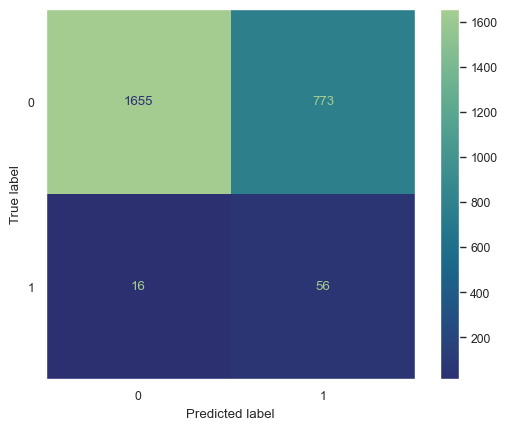

In [25]:
# Confusion matrix plot

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=model1.classes_)
matrix.plot(cmap='crest_r')

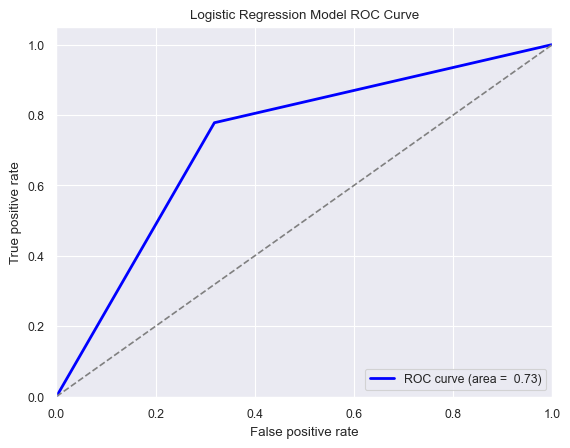

In [26]:
# ROC curve plot

fpr, tpr, _= metrics.roc_curve(y_test, y_pred)
logistic_roc_auc = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {logistic_roc_auc : .2f})')
plt.title('Logistic Regression Model ROC Curve')
plt.plot([0,1], [0,1], color = 'gray', linestyle= '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)
plt.legend(loc= 'lower right')
plt.show()

---
## Training features to predict different failure modes

In [27]:
df

,Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure,TWF,HDF,PWF,OSF,RNF
0,308.6,1551,42.8,0,0,0,0,0,0,0
1,308.7,1408,46.3,3,0,0,0,0,0,0
2,308.5,1498,49.4,5,0,0,0,0,0,0
3,308.6,1433,39.5,7,0,0,0,0,0,0
4,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,308.4,1604,29.5,14,0,0,0,0,0,0
9996,308.4,1632,31.8,17,0,0,0,0,0,0
9997,308.6,1645,33.4,22,0,0,0,0,0,0
9998,308.7,1408,48.5,25,0,0,0,0,0,0


In [28]:
y = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

In [29]:
X

,Process_temperature_[K],Torque_[Nm],Tool_wear_[min]
0,308.6,42.8,0
1,308.7,46.3,3
2,308.5,49.4,5
3,308.6,39.5,7
4,308.7,40.0,9
...,...,...,...
9995,308.4,29.5,14
9996,308.4,31.8,17
9997,308.6,33.4,22
9998,308.7,48.5,25


In [30]:
y

,TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
9995,0,0,0,0,0
9996,0,0,0,0,0
9997,0,0,0,0,0
9998,0,0,0,0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Original class distribution:", dict(zip(*np.unique(y_train, return_counts=True))))

Original class distribution: {0: 37210, 1: 290}


In [32]:
# Fitting the multinomial logistic regression model

model2 = LogisticRegression(random_state=42)

model2 = MultiOutputClassifier(LogisticRegression(random_state=42), n_jobs=1)

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

In [33]:
class_report_log2 = metrics.classification_report(y_test, y_pred)

/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/P

In [34]:
# Checking the scores

print('Multinomial Logistic Regression')
print(class_report_log2)

Multinomial Logistic Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        23
           3       0.79      0.75      0.77        20
           4       0.00      0.00      0.00         6

   micro avg       0.75      0.18      0.29        83
   macro avg       0.16      0.15      0.15        83
weighted avg       0.19      0.18      0.19        83
 samples avg       0.01      0.01      0.01        83



---
# Decision tree approach

In [35]:
df

,Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure,TWF,HDF,PWF,OSF,RNF
0,308.6,1551,42.8,0,0,0,0,0,0,0
1,308.7,1408,46.3,3,0,0,0,0,0,0
2,308.5,1498,49.4,5,0,0,0,0,0,0
3,308.6,1433,39.5,7,0,0,0,0,0,0
4,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,308.4,1604,29.5,14,0,0,0,0,0,0
9996,308.4,1632,31.8,17,0,0,0,0,0,0
9997,308.6,1645,33.4,22,0,0,0,0,0,0
9998,308.7,1408,48.5,25,0,0,0,0,0,0


## Decision tree to predict `Machine_failure`

In [36]:
# Defining the variables

variables = ['Process_temperature_[K]','Rotational_speed_[rpm]','Torque_[Nm]','Tool_wear_[min]']
y = df[['Machine_failure']]
X = df[variables]
print(y)
print(type(y))
print(60*'_')
print(type(X))
print(X)

      Machine_failure
0                   0
1                   0
2                   0
3                   0
4                   0
...               ...
9995                0
9996                0
9997                0
9998                0
9999                0

[10000 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
____________________________________________________________
<class 'pandas.core.frame.DataFrame'>
      Process_temperature_[K]  Rotational_speed_[rpm]  Torque_[Nm]  \
0                       308.6                    1551         42.8   
1                       308.7                    1408         46.3   
2                       308.5                    1498         49.4   
3                       308.6                    1433         39.5   
4                       308.7                    1408         40.0   
...                       ...                     ...          ...   
9995                    308.4                    1604         29.5   
9996         

In [37]:
# Train-test split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
# Checking the training data class distribution

print("Original class distribution:", dict(zip(*np.unique(y_train, return_counts=True))))

Original class distribution: {0: 7233, 1: 267}


In [39]:
# SMOTEEEN to balance the class distribution

smote_een = SMOTEENN(random_state=42)

X_train , y_train = smote_een.fit_resample(X_train, y_train)

print("New class distribution:", dict(zip(*np.unique(y_train, return_counts=True))))

New class distribution: {0: 6104, 1: 6595}


In [40]:
# Decision tree fitting and prediction

from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree.fit(X_train, y_train)

decision_tree_prediction = decision_tree.predict(X_test)

class_report_dt = metrics.classification_report(y_test, decision_tree_prediction)
print(class_report_dt)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2428
           1       0.21      0.75      0.33        72

    accuracy                           0.91      2500
   macro avg       0.60      0.83      0.64      2500
weighted avg       0.97      0.91      0.94      2500



In [41]:
# Cross-validated balanced accuracy

print('Balanced Accuracy Scores:')
cross_val_score(decision_tree, X, y, scoring='balanced_accuracy').mean()

Balanced Accuracy Scores:


0.6433038586547968

In [42]:
# Cross-validated F1

print('F1 Scores:')

cross_val_score(decision_tree, X, y, scoring='f1').mean()

F1 Scores:


0.34073038756540186

In [43]:
# Cross-validated recall

print('Recall Scores:')

cross_val_score(decision_tree, X, y, scoring='recall').mean()

Recall Scores:


0.30368744512730467

In [44]:
# Cross-validated precision

print('Precision Scores:')

cross_val_score(decision_tree, X, y, scoring='precision').mean()

Precision Scores:


0.39831820904462417

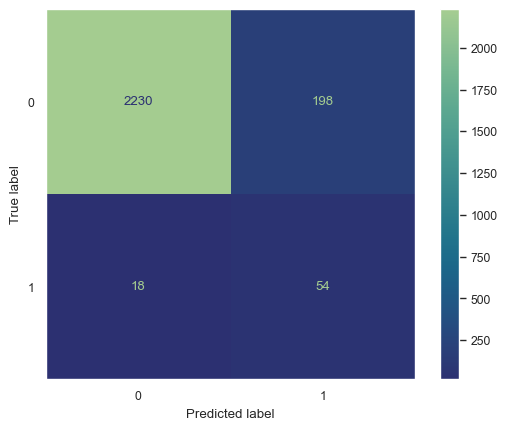

In [45]:
# Confusion matrix plot

cm = metrics.confusion_matrix(y_test, decision_tree_prediction, labels=decision_tree.classes_)
matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
matrix.plot(cmap='crest_r')

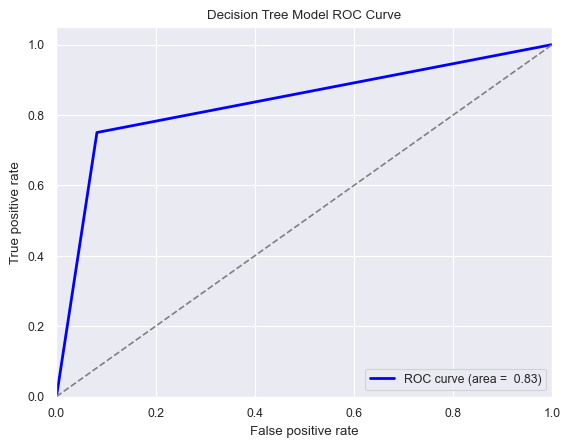

In [46]:
# ROC curve plot

fpr, tpr, _= metrics.roc_curve(y_test, decision_tree_prediction)
dt_roc_auc = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {dt_roc_auc : .2f})')
plt.title('Decision Tree Model ROC Curve')
plt.plot([0,1], [0,1], color = 'gray', linestyle= '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)
plt.legend(loc= 'lower right')
plt.show()

In [47]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20,20))
# fig = plot_tree(decision_tree, max_depth=4, fontsize=8, feature_names=X.columns)

In [48]:
# Decision tree feature importances

decision_tree.feature_importances_
importances = pd.DataFrame(decision_tree.feature_importances_, index=X.columns)
importances

,0
Process_temperature_[K],0.020873
Rotational_speed_[rpm],0.493025
Torque_[Nm],0.262180
Tool_wear_[min],0.223923


---
# Random forest approach

In [49]:
df

,Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure,TWF,HDF,PWF,OSF,RNF
0,308.6,1551,42.8,0,0,0,0,0,0,0
1,308.7,1408,46.3,3,0,0,0,0,0,0
2,308.5,1498,49.4,5,0,0,0,0,0,0
3,308.6,1433,39.5,7,0,0,0,0,0,0
4,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,308.4,1604,29.5,14,0,0,0,0,0,0
9996,308.4,1632,31.8,17,0,0,0,0,0,0
9997,308.6,1645,33.4,22,0,0,0,0,0,0
9998,308.7,1408,48.5,25,0,0,0,0,0,0


In [50]:
print(y)
print(60*'_')
print(X)

      Machine_failure
0                   0
1                   0
2                   0
3                   0
4                   0
...               ...
9995                0
9996                0
9997                0
9998                0
9999                0

[10000 rows x 1 columns]
____________________________________________________________
      Process_temperature_[K]  Rotational_speed_[rpm]  Torque_[Nm]  \
0                       308.6                    1551         42.8   
1                       308.7                    1408         46.3   
2                       308.5                    1498         49.4   
3                       308.6                    1433         39.5   
4                       308.7                    1408         40.0   
...                       ...                     ...          ...   
9995                    308.4                    1604         29.5   
9996                    308.4                    1632         31.8   
9997               

In [51]:
# Train-test split and checking the training class distribution

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Original class distribution:", dict(zip(*np.unique(y_train, return_counts=True))))

Original class distribution: {0: 7233, 1: 267}


In [52]:
# Applying SMOTEEEN to balance out the class distribution

smote_een = SMOTEENN(random_state=42)

X_train , y_train = smote_een.fit_resample(X_train, y_train)

print("New class distribution:", dict(zip(*np.unique(y_train, return_counts=True))))

New class distribution: {0: 6104, 1: 6595}


In [53]:
# Splitting the training dataset for the grid search

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [54]:
# Hyperparameters to search through in the grid search

params = {'n_estimators' : [25,50,100],
          'max_depth' : [5,10,50],
          'min_samples_leaf' : [0.5,1],
          'min_samples_split' : [0.001,0.01],
          'max_samples' : [0.5,0.9]
          }

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit, GridSearchCV, StratifiedKFold

In [56]:
# Custom splitting

split_index = [0 if x in X_val.index else -1 for x in X_train.index]

custom_split = PredefinedSplit(split_index)

In [57]:
# Instantiating the model
rf = RandomForestClassifier(random_state=42)

In [58]:
# Grid search
rf_val = GridSearchCV(rf, params, cv=custom_split, refit='f1', n_jobs=-1, verbose=0)

In [59]:
# Random forest fitting

rf_val.fit(X_train, y_train)

/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ...,  0, -1])),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 50], 'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [25, 50, 100]},
             refit='f1')

In [60]:
# Best parameters after the grid search

rf_val.best_params_

{'max_depth': 50,
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [61]:
# Model with optimal parameters
rf_optimal = RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_leaf=1, min_samples_split=0.001, n_estimators=100, random_state=42)

In [62]:
rf_optimal.fit(X_train, y_train)

/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       random_state=42)

In [63]:
# Model performance
y_pred = rf_optimal.predict(X_test)

In [64]:
class_report_rf = metrics.classification_report(y_test, y_pred)
print(class_report_rf)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2428
           1       0.21      0.88      0.34        72

    accuracy                           0.90      2500
   macro avg       0.60      0.89      0.64      2500
weighted avg       0.97      0.90      0.93      2500



In [65]:
# Cross-validated F1

cross_val_score(rf_optimal, X, y, scoring='f1').mean()

/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

0.4688137858811502

In [66]:
# Stratified cross-validation of F1

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(rf_optimal, X, y, cv=skf, scoring='f1').mean()

/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

0.5418565529508925

In [67]:
# Stratified cross-validation of recall

cross_val_score(rf_optimal, X, y, cv=skf, scoring='recall').mean()

/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

0.40996488147497806

In [69]:
# Stratified cross-validation of precision

print('Precision Scores:')

cross_val_score(rf_optimal, X, y, cv=skf,scoring='precision').mean()

Precision Scores:


/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/PM/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

0.8044482173174872

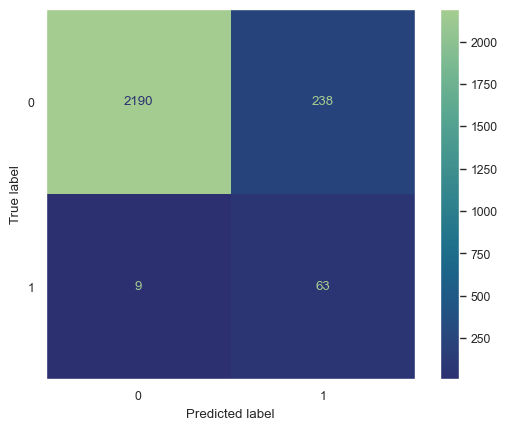

In [70]:
# Confusion matrix plot

cm = metrics.confusion_matrix(y_test, rf_optimal.predict(X_test), labels=rf_optimal.classes_)
matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_optimal.classes_)
matrix.plot(cmap='crest_r')

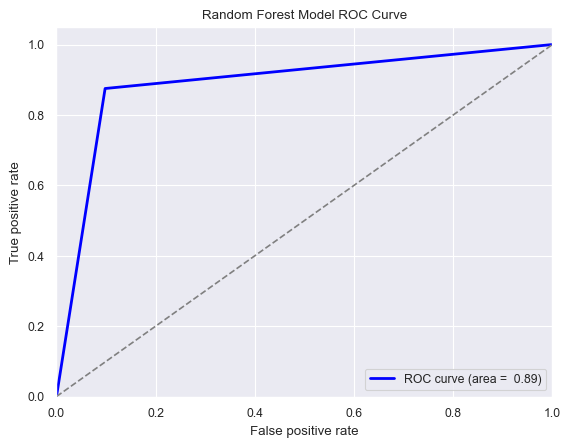

In [71]:
# ROC curve plot

fpr, tpr, _= metrics.roc_curve(y_test, y_pred)
rf_roc_auc = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {rf_roc_auc : .2f})')
plt.title('Random Forest Model ROC Curve')
plt.plot([0,1], [0,1], color = 'gray', linestyle= '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)
plt.legend(loc= 'lower right')
plt.show()

---
# Model comparison

In [72]:
print('Logistic Regression')
print(class_report_log)
print(60*'_')
print('Decision Tree')
print(class_report_dt)
print(60*'_')
print('Random Forest')
print(class_report_rf)

Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.68      0.81      2428
           1       0.07      0.78      0.12        72

    accuracy                           0.68      2500
   macro avg       0.53      0.73      0.47      2500
weighted avg       0.96      0.68      0.79      2500

____________________________________________________________
Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2428
           1       0.21      0.75      0.33        72

    accuracy                           0.91      2500
   macro avg       0.60      0.83      0.64      2500
weighted avg       0.97      0.91      0.94      2500

____________________________________________________________
Random Forest
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2428
           1       0.21      0.88      0.34        72

    accuracy

<Axes: >

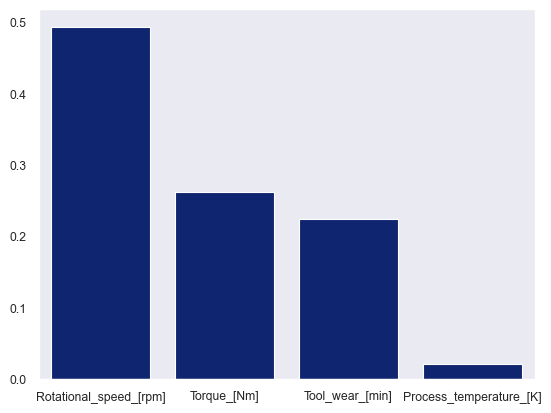

In [73]:
# Decision tree feature importance plot

dt_feature_importance = pd.Series(decision_tree.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(data=dt_feature_importance)

<Axes: >

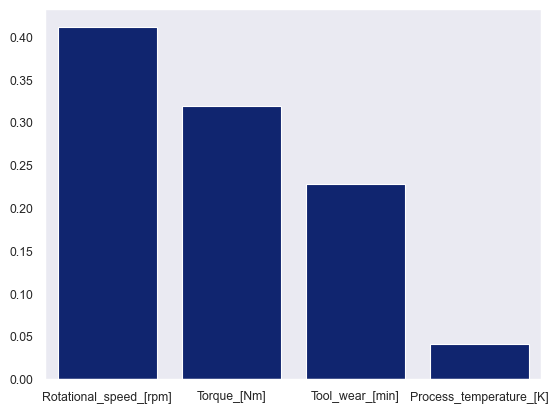

In [74]:
# Random forest feature importance plot

rf_feature_importance = pd.Series(rf_optimal.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(data=rf_feature_importance)